# **Project Title**



---


Exploratory Data Analysis of Alexstore Sales and Customer Purchasing Patterns
# **Problem Statement**

---



Perform exploratory data analysis on the Alexstore dataset to identify sales performance, customer purchasing behavior, product demand, and regional trends. The analysis aims to uncover key factors influencing revenue, profit, and order quantity to support strategic business decision-making.
# **Objectives**

---





*   Examine overall sales, profit, and order quantity performance


*   Analyze sales trends across time (year, month, seasonality)

* Identify top-performing and underperforming products and categories


* Evaluate customer and regional purchasing behavior

*   Detect patterns, correlations, and anomalies affecting profitability
*  Generate actionable business insights from data exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sheets=pd.read_excel('/content/alexstore_sales_analysis.xlsx',sheet_name=None)

**Initial Inspection**

In [5]:
df_sales = sheets['purchasr_table']
df_customer = sheets['customer_table']
df_product = sheets['product_table']
df_location = sheets['location_table']
df_shipping = sheets['shipment_table']

In [6]:
print("df_sales shape:", df_sales.shape)
print("df_customer shape:", df_customer.shape)
print("df_product shape:", df_product.shape)
print("df_location shape:", df_location.shape)
print("df_shipping shape:", df_shipping.shape)



df_sales shape: (9994, 11)
df_customer shape: (793, 3)
df_product shape: (1894, 4)
df_location shape: (632, 5)
df_shipping shape: (4, 1)


In [7]:
df_sales.head()

,Order ID,Order Date,Ship Date,Customer ID,Product ID,Postal Code,Ship Mode,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,FUR-BO-10001798,42420,Second Class,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,FUR-CH-10000454,42420,Second Class,731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,OFF-LA-10000240,90036,Second Class,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,SO-20335,FUR-TA-10000577,33311,Standard Class,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,OFF-ST-10000760,33311,Standard Class,22.3680,2,0.20,2.5164


In [8]:
df_customer.head()

,Customer ID,Customer Name,Segment
0,CG-12520,Claire Gute,Consumer
1,DV-13045,Darrin Van Huff,Corporate
2,SO-20335,Sean O'Donnell,Consumer
3,BH-11710,Brosina Hoffman,Consumer
4,AA-10480,Andrew Allen,Consumer


In [9]:
df_product.head()

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [10]:
df_location.head()

,Country,City,State,Postal Code,Region
0,United States,Henderson,Kentucky,42420.0,South
1,United States,Los Angeles,California,90036.0,West
2,United States,Fort Lauderdale,Florida,33311.0,South
3,United States,Los Angeles,California,90032.0,West
4,United States,Concord,North Carolina,28027.0,South


In [11]:
df_shipping.head()

,Ship Mode
0,Second Class
1,Standard Class
2,First Class
3,Same Day


In [12]:
df_sales.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [13]:
df_customer.describe()

,Customer ID,Customer Name,Segment
count,793,793,793
unique,793,793,3
top,SM-20905,Susan MacKendrick,Consumer
freq,1,1,409


In [14]:
df_product.describe()

,Product ID,Category,Sub-Category,Product Name
count,1862,1894,1894,1894
unique,1862,3,17,1850
top,OFF-ST-10001627,Office Supplies,Paper,Staples
freq,1,1098,284,10


In [15]:
tables = [df_sales, df_customer, df_product, df_location, df_shipping]

for df in tables:
    print(df.isnull().sum(), "\n")


Order ID       0
Order Date     0
Ship Date      0
Customer ID    0
Product ID     0
Postal Code    0
Ship Mode      0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64 

Customer ID      0
Customer Name    0
Segment          0
dtype: int64 

Product ID      32
Category         0
Sub-Category     0
Product Name     0
dtype: int64 

Country        0
City           0
State          0
Postal Code    1
Region         0
dtype: int64 

Ship Mode    0
dtype: int64 



In [16]:
df_product = df_product.dropna(subset=['Product ID'])


In [17]:
df_product.isnull().sum()

,0
Product ID,0
Category,0
Sub-Category,0
Product Name,0


# **Data cleaning and Wrangling**

In [18]:
# Merge Customer Table
df_merged = df_sales.merge(df_customer, on='Customer ID', how='left')

# Merge Product Table
df_merged = df_merged.merge(df_product, on='Product ID', how='left')

# Merge Location Table
df_merged = df_merged.merge(df_location, on='Postal Code', how='left')

# Merge Shipping Table
df_merged = df_merged.merge(df_shipping, on='Ship Mode', how='left')


In [19]:
df_merged.head()

,Order ID,Order Date,Ship Date,Customer ID,Product ID,Postal Code,Ship Mode,Sales,Quantity,Discount,Profit,Customer Name,Segment,Category,Sub-Category,Product Name,Country,City,State,Region
0,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,FUR-BO-10001798,42420,Second Class,261.9600,2,0.00,41.9136,Claire Gute,Consumer,Furniture,Bookcases,Bush Somerset Collection Bookcase,United States,Henderson,Kentucky,South
1,CA-2016-152156,2016-11-08,2016-11-11,CG-12520,FUR-CH-10000454,42420,Second Class,731.9400,3,0.00,219.5820,Claire Gute,Consumer,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",United States,Henderson,Kentucky,South
2,CA-2016-138688,2016-06-12,2016-06-16,DV-13045,OFF-LA-10000240,90036,Second Class,14.6200,2,0.00,6.8714,Darrin Van Huff,Corporate,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,United States,Los Angeles,California,West
3,US-2015-108966,2015-10-11,2015-10-18,SO-20335,FUR-TA-10000577,33311,Standard Class,957.5775,5,0.45,-383.0310,Sean O'Donnell,Consumer,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,United States,Fort Lauderdale,Florida,South
4,US-2015-108966,2015-10-11,2015-10-18,SO-20335,OFF-ST-10000760,33311,Standard Class,22.3680,2,0.20,2.5164,Sean O'Donnell,Consumer,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,United States,Fort Lauderdale,Florida,South


In [20]:
# converting column names into lowercase for consistency
df_merged.columns=df_merged.columns.str.lower()

In [21]:
df_merged.columns

Index(['order id', 'order date', 'ship date', 'customer id', 'product id',
       'postal code', 'ship mode', 'sales', 'quantity', 'discount', 'profit',
       'customer name', 'segment', 'category', 'sub-category', 'product name',
       'country', 'city', 'state', 'region'],
      dtype='object')

In [22]:
# Check for duplicate transaction records
print("\nDuplicate Rows:", df_merged.duplicated().sum())


Duplicate Rows: 1


In [23]:
df_merged = df_merged.drop_duplicates()


In [24]:
#  Check key columns null values (relationship validation)
key_columns = ['order id', 'customer id', 'product id', 'postal code']

print("\nNull Values in Key Columns:")
print(df_merged[key_columns].isnull().sum())


Null Values in Key Columns:
order id       0
customer id    0
product id     0
postal code    0
dtype: int64


In [25]:
# Check dataset shape
print("Merged Dataset Shape:", df_merged.shape)

Merged Dataset Shape: (9993, 20)


In [26]:
# Check current data types
print(df_merged.dtypes)

order id                 object
order date       datetime64[ns]
ship date        datetime64[ns]
customer id              object
product id               object
postal code               int64
ship mode                object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
customer name            object
segment                  object
category                 object
sub-category             object
product name             object
country                  object
city                     object
state                    object
region                   object
dtype: object


In [27]:
df_merged['postal code'] = df_merged['postal code'].astype(str)


In [28]:
# Check missing values
print("Missing Values:\n")
print(df_merged.isnull().sum())

Missing Values:

order id         0
order date       0
ship date        0
customer id      0
product id       0
postal code      0
ship mode        0
sales            0
quantity         0
discount         0
profit           0
customer name    0
segment          0
category         0
sub-category     0
product name     0
country          0
city             0
state            0
region           0
dtype: int64


In [29]:
# Check duplicate keys in dimension level columns
print("Duplicate Product IDs:", df_merged['product id'].duplicated().sum())
print("Duplicate Customer IDs:", df_merged['customer id'].duplicated().sum())
print("Duplicate Postal Codes:", df_merged['postal code'].duplicated().sum())
print("Duplicate Order IDs:", df_merged['order id'].duplicated().sum())

Duplicate Product IDs: 8131
Duplicate Customer IDs: 9200
Duplicate Postal Codes: 9362
Duplicate Order IDs: 4984


In [30]:
# Checking negative or unusual values in key business metrics
print("Negative Sales:", (df_merged['sales'] < 0).sum())
print("Negative Profit:", (df_merged['profit'] < 0).sum())
print("Negative Quantity:", (df_merged['quantity'] < 0).sum())

Negative Sales: 0
Negative Profit: 1870
Negative Quantity: 0


In [31]:
# Checking discount range (should typically be between 0 and 1)
print("\nInvalid Discount Values:", ((df_merged['discount'] < 0) | (df_merged['discount'] > 1)).sum())


Invalid Discount Values: 0


In [32]:
# Summary statistics to detect outliers
print("\nBusiness Metrics Summary:\n")
print(df_merged[['sales', 'profit', 'quantity', 'discount']].describe())


Business Metrics Summary:

              sales       profit     quantity     discount
count   9993.000000  9993.000000  9993.000000  9993.000000
mean     229.852846    28.660971     3.789753     0.156188
std      623.276074   234.271476     2.225149     0.206457
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.731000     2.000000     0.000000
50%       54.480000     8.671000     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


In [33]:
# Order Year
df_merged['order year'] = df_merged['order date'].dt.year

# Order Month
df_merged['order month'] = df_merged['order date'].dt.month

# Order Month Name
df_merged['order month name'] = df_merged['order date'].dt.month_name()

# Shipping Duration (Days)
df_merged['shipping days'] = (df_merged['ship date'] - df_merged['order date']).dt.days


In [34]:

# Profit Margin Percentage
df_merged['profit margin %'] = (df_merged['profit'] / df_merged['sales']) * 100


## **EDA**

In [35]:
#KPI
df_merged[['sales','profit']].sum()



,0
sales,2.296919e+06
profit,2.864091e+05




*   Total Sales = ~2.29 Million

* Total Profit = ~0.29 Million

This shows the business generated profit from overall sales.List item




In [36]:
# profotiblity check
df_merged['profit margin %'].mean()


np.float64(12.033025825827846)

The average profit margin across all transactions is approximately 12.03%, indicating that the business earns about ₹12 profit for every ₹100 in sales.

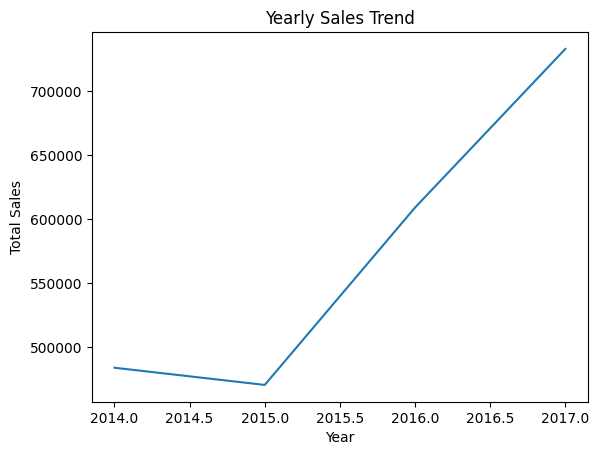

In [37]:
#sales trend over years
yearly_sales = df_merged.groupby('order year')['sales'].sum()
yearly_sales.plot(kind='line', title='Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


In [38]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

df_merged['order month name'] = pd.Categorical(
    df_merged['order month name'],
    categories=month_order,
    ordered=True
)

/tmp/ipython-input-2522054731.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df_merged.groupby('order month name')['sales'].sum()


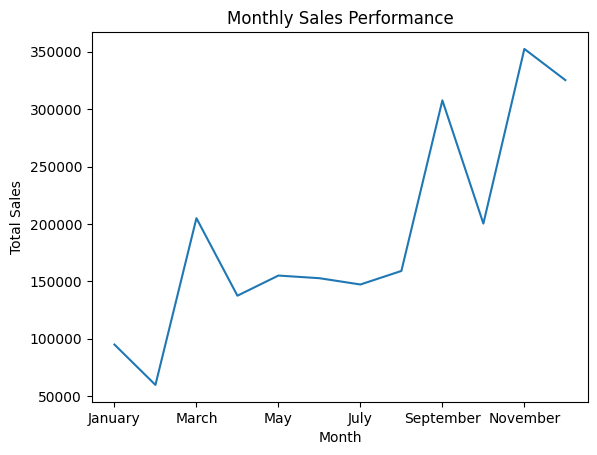

In [39]:
#monthly seasonality
monthly_sales = df_merged.groupby('order month name')['sales'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Performance')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

### **Category Performance Analysis**
Which products drive business growth?

<function matplotlib.pyplot.show(close=None, block=None)>

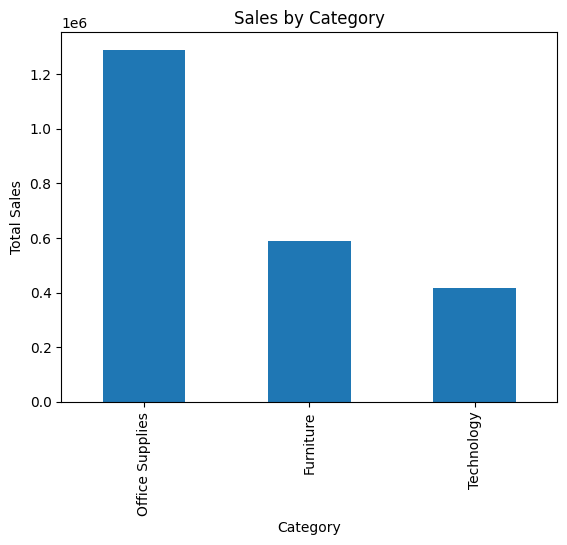

In [40]:
# Sales by Category
category_sales = df_merged.groupby('category')['sales'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show

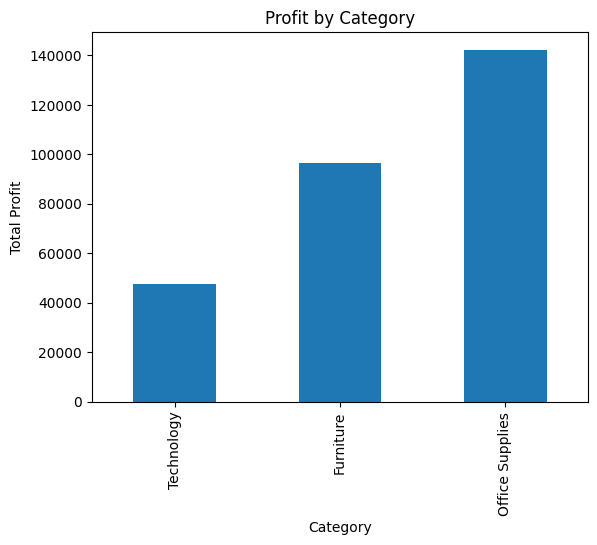

In [41]:
# Profit by Category
category_profit = df_merged.groupby('category')['profit'].sum().sort_values()

category_profit.plot(kind='bar')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

### **Regional Performance**

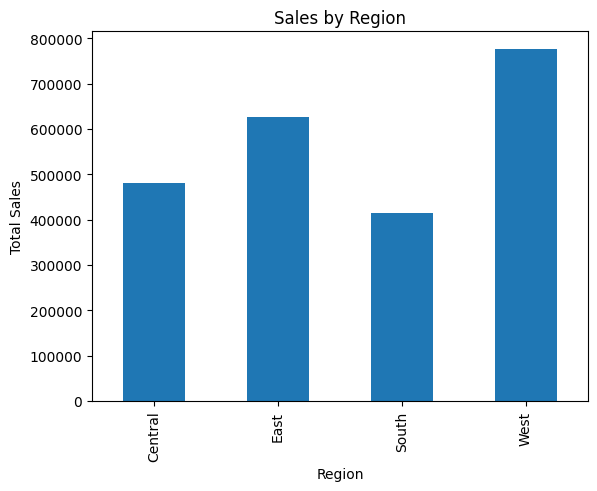

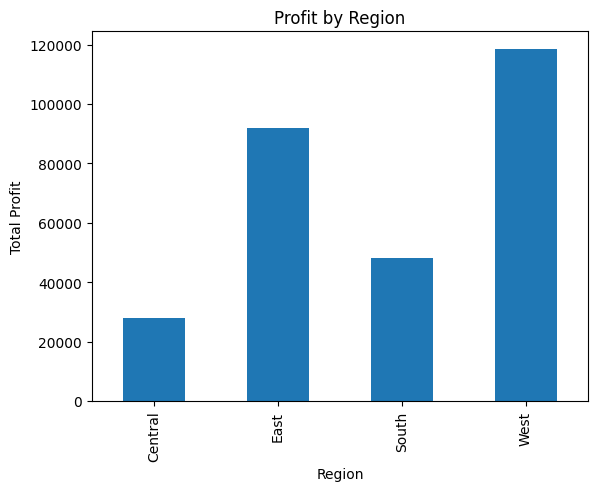

In [42]:
# sales by region
region_sales = df_merged.groupby('region')['sales'].sum()

region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

#profit by region
df_merged.groupby('region')['profit'].sum().plot(kind='bar')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

### **Customer Segment Analysis**
Which customer types are most valuable

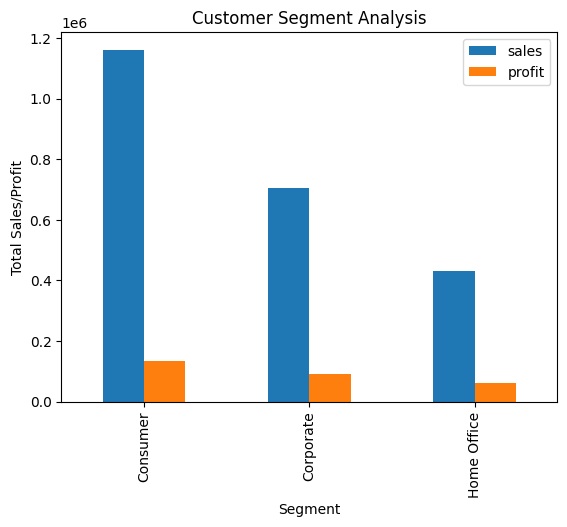

In [43]:
segment_analysis = df_merged.groupby('segment')[['sales','profit']].sum()

segment_analysis.plot(kind='bar')
plt.title('Customer Segment Analysis')
plt.xlabel('Segment')
plt.ylabel('Total Sales/Profit')
plt.show()


### **Top / Bottom Product Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

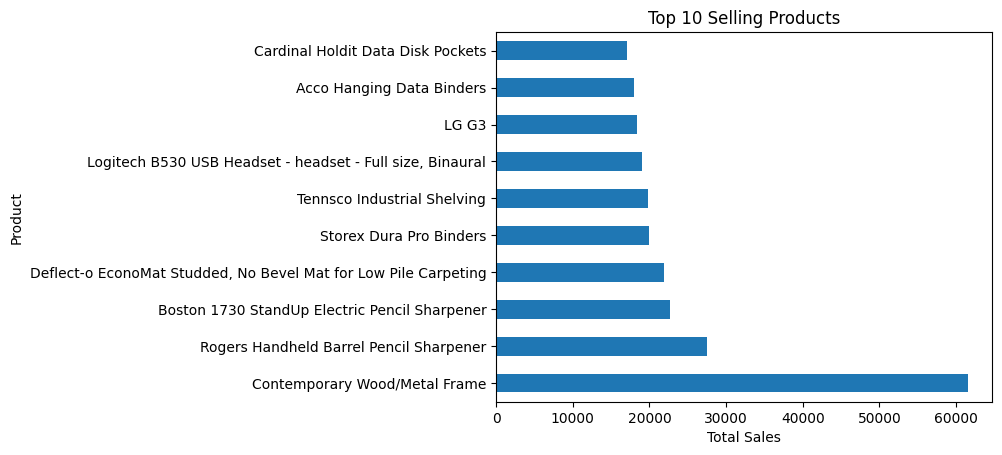

In [44]:
top_products = df_merged.groupby('product name')['sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh')
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show


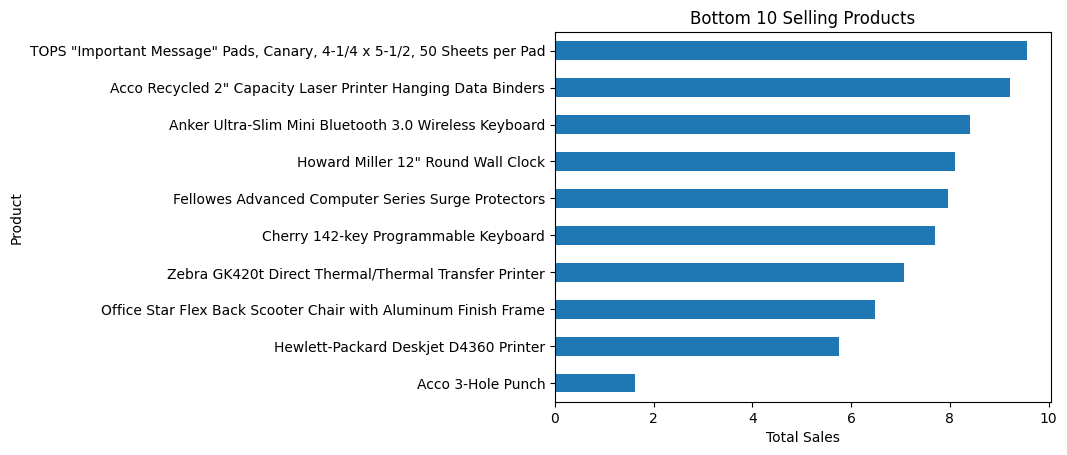

In [ ]:
bottom_products = df_merged.groupby('product name')['sales'].sum().sort_values(ascending=True).head(10)

bottom_products.plot(kind='barh')
plt.title('Bottom 10 Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()
